<h1>Characteristics of Power Flow</h1>

<p>This notebooks analyses how the parameters influence power flow</p>
<p>Let us consider the following circuit</p>

<img src="PowerFlow.png" alt="drawing" width="600"  height="300"/>

<p>For sake of simplicity we consider a symmetrical balanced network in Park rotating frame+</p>
<p>Input data</p>

In [102]:
clear all
SetSimulationEnvironment;

% Voltage of the line
Vn = sqrt(3)*220

% Load
Pn = 100
Qn = 10

% Voltage of the source
Vs = sqrt(3)*220

% Angle of the source
th = 0;

% Impedance
Z = 100



% Frequency
om = 2*pi*50

Vn =  381.05
Pn =  100
Qn =  10
Vs =  381.05
Z =  100
om =  314.16


<p>The characteristic angle of the impedance plays a key role</p>

In [103]:
% Impedance angle
fi = 85*pi/180

R = Z*cos(fi)
L = Z*sin(fi)/om

fi =  1.4835
R =  8.7156
L =  0.31710


<p>Let us now consider a rotating frame</p>

In [104]:
Ar = [-R/L om;-om -R/L]
Br = [1/L 0; 0 1/L]
C = eye(2)
D = [0 0; 0 0]

Ar =

   -27.485   314.159
  -314.159   -27.485

Br =

   3.15359   0.00000
   0.00000   3.15359

C =

Diagonal Matrix

   1   0
   0   1

D =

   0   0
   0   0



<p>Let us now simulate the system to appreciate the role of the variables</p>

In [105]:
% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 0.6;
% Time Step
dt = 0.0001;
% Number of data flows in the schematic
nflows = 10;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);


delta = 0.2;

% List of components
c1{1} = StepSource(1,Vs,(1+delta)*Vs,0.25);
c1{2} = StepSource(2,th,th+pi/6,0.4);
c1{3} = Constant(3,Vn);
c1{4} = Fcnu([1,2],4,"u(1)*cos(u(2))");
c1{5} = Fcnu([1,2],5,"u(1)*sin(u(2))");
c1{6} = Sum(3,4,6,1,1);
c1{7} = StateSpace([6,5],[7,8],Ar,Br,C,D,[0;0]);
c1{8} = Fcnu([6,5,7,8],9,"u(1)*u(3)-u(2)*u(4)");
c1{9} = Fcnu([6,5,7,8],10,"-u(1)*u(4)+u(2)*u(3)");

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([9,10]);

<p>The diagram presents the power components in this situation</p>

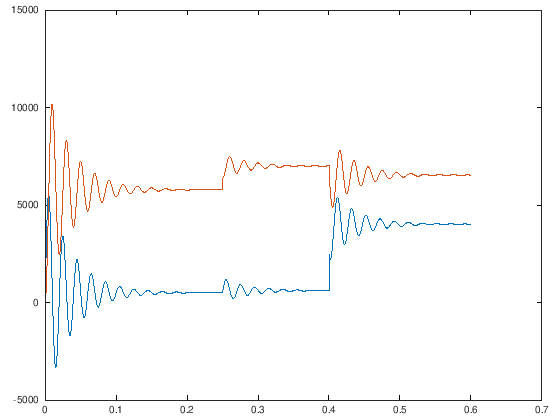

In [106]:
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));

<p>Let us consider now an intermediate case</p>

In [107]:
% Impedance angle
fi = 45*pi/180

R = Z*cos(fi)
L = Z*sin(fi)/om

Ar = [-R/L om;-om -R/L]
Br = [1/L 0; 0 1/L]
C = eye(2)
D = [0 0; 0 0]

fi =  0.78540
R =  70.711
L =  0.22508
Ar =

  -314.16   314.16
  -314.16  -314.16

Br =

   4.44288   0.00000
   0.00000   4.44288

C =

Diagonal Matrix

   1   0
   0   1

D =

   0   0
   0   0



In [108]:
% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);


delta = 0.2;

% List of components
c1{1} = StepSource(1,Vs,(1+delta)*Vs,0.25);
c1{2} = StepSource(2,th,th+pi/6,0.4);
c1{3} = Constant(3,Vn);
c1{4} = Fcnu([1,2],4,"u(1)*cos(u(2))");
c1{5} = Fcnu([1,2],5,"u(1)*sin(u(2))");
c1{6} = Sum(3,4,6,1,1);
c1{7} = StateSpace([6,5],[7,8],Ar,Br,C,D,[0;0]);
c1{8} = Fcnu([6,5,7,8],9,"u(1)*u(3)-u(2)*u(4)");
c1{9} = Fcnu([6,5,7,8],10,"-u(1)*u(4)+u(2)*u(3)");

sc1.AddListComponents(c1);

% Run the schematic and plot
out2 = sc1.Run([9,10]);

<p>And the power components will be</p>

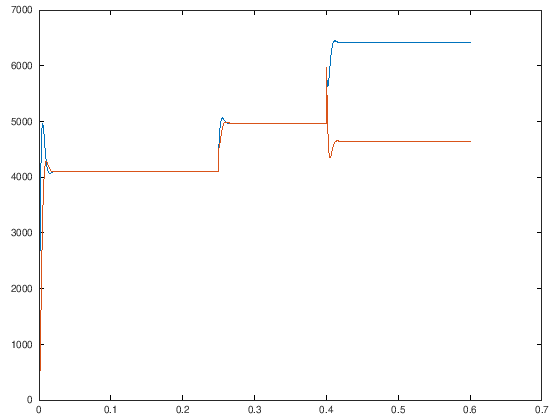

In [109]:
plot(out2(1,:),out2(2,:),out2(1,:),out2(3,:));

<p>Separation between P and Q is not there anymore</p>